In [176]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data preparation

In [177]:
df = pd.read_excel('../data/CarPrice_Assignment.xlsx')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [179]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [180]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [181]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [182]:
numaricalCol = [x for x in df.columns if df[x].dtype != 'object']
catagoricalCol = [x for x in df.columns if df[x].dtype == 'object']


In [183]:
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values

car_ID              0
symboling           0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
CarName             0
price               0
dtype: int64

In [184]:
for col in catagoricalCol:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

for col in numaricalCol:
    ss = StandardScaler()
    df[col] = ss.fit_transform(df[col].values.reshape(-1,1))

In [185]:
target = df['price']

In [186]:
estimators = all_estimators(type_filter='regressor')

In [187]:
def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model Name: ', model.__class__.__name__)
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 Score: ', r2_score(y_test, y_pred))
    print('')
    return model.__class__.__name__, mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

In [188]:
X = df.drop(['price'], axis=1)
y = df['price']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
df_compare = pd.DataFrame(columns=['Model Name', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score'])

In [191]:
for name, class_ in estimators:
    try:
        model = class_()
        ans = eval(model, X_train, y_train, X_test, y_test)
        df_compare = pd.concat([df_compare, pd.DataFrame([[ans[0], ans[1], ans[2], ans[3], ans[4]]], columns=['Model Name', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score'])])
    except Exception as e:
        pass

Model Name:  ARDRegression
Mean Absolute Error:  0.2819386256677565
Mean Squared Error:  0.16421985290296678
Root Mean Squared Error:  0.4052404877390298
R2 Score:  0.8494657143161433

Model Name:  AdaBoostRegressor
Mean Absolute Error:  0.26647150268550535
Mean Squared Error:  0.11119521232617113
Root Mean Squared Error:  0.3334594612935298
R2 Score:  0.8980714477385666

Model Name:  BaggingRegressor
Mean Absolute Error:  0.1824611641479258
Mean Squared Error:  0.07302898024482
Root Mean Squared Error:  0.2702387467496473
R2 Score:  0.9330570258038767

Model Name:  BayesianRidge
Mean Absolute Error:  0.27232753693567185
Mean Squared Error:  0.16862356831999262
Root Mean Squared Error:  0.4106380015536709
R2 Score:  0.8454289907231154

Model Name:  DecisionTreeRegressor
Mean Absolute Error:  0.25564867968095173
Mean Squared Error:  0.1423739622681479
Root Mean Squared Error:  0.37732474377934444
R2 Score:  0.8694910369778511

Model Name:  DummyRegressor
Mean Absolute Error:  0.76763669

Model Name:  ElasticNetCV
Mean Absolute Error:  0.27557137907368034
Mean Squared Error:  0.1650576404474647
Root Mean Squared Error:  0.406272864522681
R2 Score:  0.8486977453566269

Model Name:  ExtraTreeRegressor
Mean Absolute Error:  0.24634049805708888
Mean Squared Error:  0.11356280765348903
Root Mean Squared Error:  0.3369908124170287
R2 Score:  0.8959011603763143

Model Name:  ExtraTreesRegressor
Mean Absolute Error:  0.18360707753624958
Mean Squared Error:  0.08415695084443778
Root Mean Squared Error:  0.29009817449345965
R2 Score:  0.9228564253544644

Model Name:  GaussianProcessRegressor
Mean Absolute Error:  0.6608571342004148
Mean Squared Error:  0.8830818150999983
Root Mean Squared Error:  0.9397243293115265
R2 Score:  0.19051145226010424

Model Name:  GradientBoostingRegressor
Mean Absolute Error:  0.20100947893382162
Mean Squared Error:  0.08151566424366617
Root Mean Squared Error:  0.2855094818804906
R2 Score:  0.9252775954182839

Model Name:  HistGradientBoostingRegres

/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Name:  LassoLarsIC
Mean Absolute Error:  0.27076071669591345
Mean Squared Error:  0.15694287717706754
Root Mean Squared Error:  0.396160166065529
R2 Score:  0.8561362497201925

Model Name:  LinearRegression
Mean Absolute Error:  0.2722012718653913
Mean Squared Error:  0.17176040322530006
Root Mean Squared Error:  0.41443986683872497
R2 Score:  0.8425535697954298

Model Name:  LinearSVR
Mean Absolute Error:  0.3896926693740555
Mean Squared Error:  0.2706212197157285
Root Mean Squared Error:  0.5202126677770625
R2 Score:  0.7519315035261168

Model Name:  MLPRegressor
Mean Absolute Error:  2.5461629959269225
Mean Squared Error:  7.250226089300847
Root Mean Squared Error:  2.6926243869691233
R2 Score:  -5.646014998224663

Model Name:  NuSVR
Mean Absolute Error:  0.5669810074085098
Mean Squared Error:  0.8044559241523174
Root Mean Squared Error:  0.89691466938183
R2 Score:  0.2625849081842152

Model Name:  OrthogonalMatchingPursuit
Mean Absolute Error:  0.5465658548640797
Mean Squared

/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(


Model Name:  QuantileRegressor
Mean Absolute Error:  0.6867013752432755
Mean Squared Error:  1.1655866330062232
Root Mean Squared Error:  1.079623375537147
R2 Score:  -0.06845030062180513

Model Name:  RANSACRegressor
Mean Absolute Error:  0.31552831529109837
Mean Squared Error:  0.26527884084106984
Root Mean Squared Error:  0.5150522700086564
R2 Score:  0.7568286653097438

Model Name:  RadiusNeighborsRegressor
Model Name:  RandomForestRegressor
Mean Absolute Error:  0.18308634212663122
Mean Squared Error:  0.06735172401867888
Root Mean Squared Error:  0.25952210699414197
R2 Score:  0.9382611573113587

Model Name:  Ridge
Mean Absolute Error:  0.2690441763310093
Mean Squared Error:  0.1604260549312912
Root Mean Squared Error:  0.40053221459864025
R2 Score:  0.8529433490697957

Model Name:  RidgeCV
Mean Absolute Error:  0.2690441763356005
Mean Squared Error:  0.160426054936106
Root Mean Squared Error:  0.40053221460465077
R2 Score:  0.8529433490653822

Model Name:  SGDRegressor
Mean Abso

/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Name:  TheilSenRegressor
Mean Absolute Error:  0.2703242388382624
Mean Squared Error:  0.20274559535799988
Root Mean Squared Error:  0.4502728010417683
R2 Score:  0.8141505863435504

Model Name:  TransformedTargetRegressor
Mean Absolute Error:  0.2722012718653913
Mean Squared Error:  0.17176040322530006
Root Mean Squared Error:  0.41443986683872497
R2 Score:  0.8425535697954298

Model Name:  TweedieRegressor
Mean Absolute Error:  0.3450830382635509
Mean Squared Error:  0.253139616435111
Root Mean Squared Error:  0.5031298206577612
R2 Score:  0.7679562448465906



In [192]:
def drawPlot(x,y, data):
    plt.figure(figsize=(20,5))
    sns.barplot(x = x, y= y, df= df)
    plt.show()

In [193]:
df_compare = df_compare[df_compare['R2 Score'] > 0 ]
df_compare = df_compare[df_compare['R2 Score'] < 1 ]

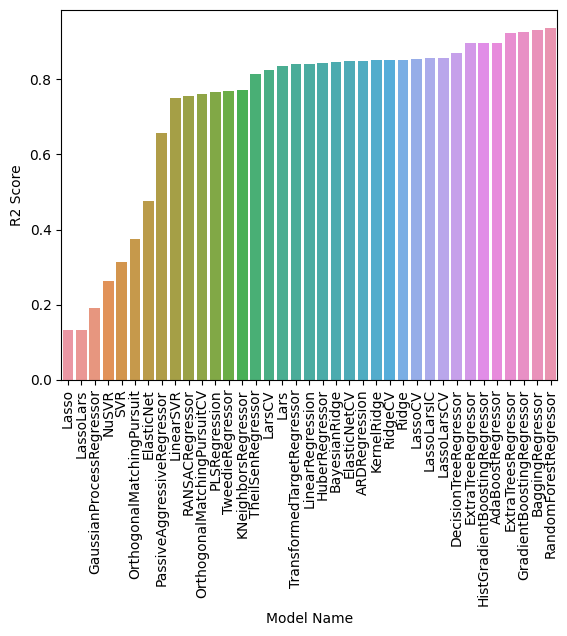

In [194]:
df_compare = df_compare.sort_values(by=['R2 Score'], ascending=True)
sns.barplot(x = 'Model Name', y= 'R2 Score', data= df_compare)
plt.xticks(rotation=90)
plt.show()

In [195]:
# Random Forest Regressor
df_compare[df_compare['Model Name'] == 'RandomForestRegressor']

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,RandomForestRegressor,0.183086,0.067352,0.259522,0.938261


In [196]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

def r2(y_true, y_pred):
    SS_res =  keras.backend.sum(keras.backend.square(y_true - y_pred)) 
    SS_tot = keras.backend.sum(keras.backend.square(y_true - keras.backend.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + keras.backend.epsilon()))

model = Sequential()
model.add(Dense(256, input_dim=25, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=[r2])

model.summary()





Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 256)               6656      
                                                                 
 dense_57 (Dense)            (None, 128)               32896     
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                                 
Total params: 47,873
Trainable params: 47,873
Non-trainable params: 0
_________________________________________________________________


Epoch 1/400
5/5 [==============================] - 1s 31ms/step - loss: 5.0762 - r2: -4.6181 - val_loss: 1.7897 - val_r2: -0.8428
Epoch 2/400
5/5 [==============================] - 0s 6ms/step - loss: 1.4124 - r2: -0.4370 - val_loss: 0.7203 - val_r2: 0.2651
Epoch 3/400
5/5 [==============================] - 0s 7ms/step - loss: 0.5172 - r2: 0.4881 - val_loss: 0.4267 - val_r2: 0.5508
Epoch 4/400
5/5 [==============================] - 0s 7ms/step - loss: 0.3193 - r2: 0.6242 - val_loss: 0.2549 - val_r2: 0.7085
Epoch 5/400
5/5 [==============================] - 0s 6ms/step - loss: 0.2357 - r2: 0.7575 - val_loss: 0.2400 - val_r2: 0.7315
Epoch 6/400
5/5 [==============================] - 0s 7ms/step - loss: 0.1556 - r2: 0.8011 - val_loss: 0.3432 - val_r2: 0.6410
Epoch 7/400
5/5 [==============================] - 0s 7ms/step - loss: 0.1950 - r2: 0.7599 - val_loss: 0.2046 - val_r2: 0.7697
Epoch 8/400
5/5 [==============================] - 0s 7ms/step - loss: 0.1287 - r2: 0.8575 - val_loss: 0.18

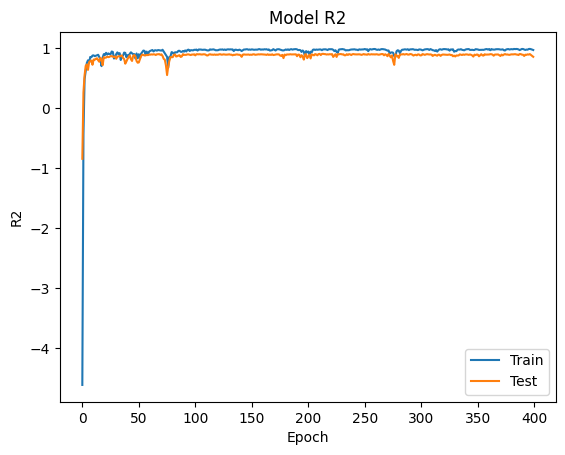

In [197]:
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('Model R2')

plt.ylabel('R2')

plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='lower right')

plt.show()

In [198]:
model.save('../model/model.h5')